<a href="https://colab.research.google.com/github/lcory15/Capstone/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# libraries and packages loaded
library(tidyverse)
library(MASS)
install.packages("corrplot")
library(corrplot)
install.packages("ppcor")
library(ppcor)
install.packages("RColorBrewer")
library(RColorBrewer)
install.packages("car")
library(car)
install.packages("expss")
library(expss)
install.packages("PerformanceAnalytics")
library(PerformanceAnalytics)
install.packages("psych")
library(psych)
install.packages("ggcorrplot")
library(ggcorrplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the depend

In [ ]:
# New way of loading in the data
data <- read.csv("https://raw.githubusercontent.com/lcory15/Capstone/main/NFL_data_with_playoff_indicator.csv")

In [ ]:
# displaying data
data

Team,WinLoss.perc,PD,Year,FGM,FG_perc,RedZone_perc,playoff_win_perc,Score_perc,Turnover_perc,RushYperG,PassYperG,PointperG,possperG,YallowedperG,PointallowedperG,perc_punt_20,Result,Playoffs
<chr>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>
New England Patriots,87.5,205,2010,22,88.0,62.7,87.50,47.0,5.4,123.3,240.4,32.4,0.4900000,366.9,19.6,30.60000,Loss,1
New York Jets,68.8,63,2010,30,76.9,40.0,68.75,32.2,10.6,148.4,203.2,22.9,0.5436111,291.4,19.0,45.50000,Loss,1
Miami Dolphins,43.8,-60,2010,30,73.2,52.9,0.00,29.7,15.7,102.7,220.4,17.1,0.5147222,309.3,20.8,42.50000,Loss,0
Buffalo Bills,25.0,-142,2010,16,76.2,51.4,0.00,25.3,19.2,107.5,197.8,17.7,0.4763889,361.6,26.6,22.70000,Loss,0
Pittsburgh Steelers,75.0,143,2010,29,78.4,48.0,75.00,36.9,9.5,120.2,225.0,23.4,0.5400000,276.8,14.5,31.60000,Loss,1
Baltimore Ravens,75.0,87,2010,26,89.7,49.0,75.00,32.8,9.5,114.4,208.4,22.3,0.5222222,318.9,16.9,49.40000,Loss,1
Cleveland Browns,31.3,-61,2010,23,82.1,45.2,0.00,27.7,15.8,102.9,186.8,16.9,0.4725000,350.1,20.8,37.20000,Loss,0
Cincinnati Bengals,25.0,-73,2010,24,77.4,49.1,0.00,30.5,16.3,95.1,235.4,20.1,0.5202778,332.0,24.7,39.40000,Loss,0
Indianapolis Colts,62.5,47,2010,26,92.9,67.9,62.50,40.2,13.4,92.7,288.1,27.2,0.4983333,341.6,24.2,31.90000,Loss,1


In [ ]:
Logistic_step_model <- glm(
                                    Playoffs ~. -playoff_win_perc-Team-WinLoss.perc,
                                    data=data,
                                    family="binomial"
                                  )

In [ ]:
step.model.logistic.forward <- Logistic_step_model %>% stepAIC(direction = "forward", trace = FALSE)
  coef(step.model.logistic.forward)

(Intercept)               PD             Year              FGM 
   -9.4330849383    -0.0464894963    -0.0009214442    -0.0236430182 
         FG_perc     RedZone_perc       Score_perc    Turnover_perc 
    0.0377440645    -0.0151993713     0.0412769066    -0.2076300392 
       RushYperG        PassYperG        PointperG         possperG 
    0.0118073899    -0.0002018534     1.0893200154    16.2536361389 
    YallowedperG PointallowedperG     perc_punt_20        ResultWin 
    0.0042976104    -1.1727661301     0.0103838277    16.9696764160

In [ ]:
summary(step.model.logistic.forward)


Call:
glm(formula = Playoffs ~ (Team + WinLoss.perc + PD + Year + FGM + 
    FG_perc + RedZone_perc + playoff_win_perc + Score_perc + 
    Turnover_perc + RushYperG + PassYperG + PointperG + possperG + 
    YallowedperG + PointallowedperG + perc_punt_20 + Result) - 
    playoff_win_perc - Team - WinLoss.perc, family = "binomial", 
    data = data)

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)   
(Intercept)      -9.433e+00  1.323e+02  -0.071  0.94314   
PD               -4.649e-02  1.280e-01  -0.363  0.71646   
Year             -9.214e-04  6.543e-02  -0.014  0.98876   
FGM              -2.364e-02  4.868e-02  -0.486  0.62716   
FG_perc           3.774e-02  2.838e-02   1.330  0.18346   
RedZone_perc     -1.520e-02  3.419e-02  -0.445  0.65663   
Score_perc        4.128e-02  7.716e-02   0.535  0.59270   
Turnover_perc    -2.076e-01  7.907e-02  -2.626  0.00864 **
RushYperG         1.181e-02  1.299e-02   0.909  0.36336   
PassYperG        -2.019e-04  1.005e-02  -0.0

In [ ]:
step.model.logistic.backward <- Logistic_step_model %>% stepAIC(direction = "backward", trace = FALSE)
  coef(step.model.logistic.backward)

(Intercept)          FG_perc    Turnover_perc        PointperG 
     -9.07299669       0.03406755      -0.23729563       0.38988180 
        possperG PointallowedperG        ResultWin 
     16.00821424      -0.39791993      16.64029409

In [ ]:
summary(step.model.logistic.backward)


Call:
glm(formula = Playoffs ~ FG_perc + Turnover_perc + PointperG + 
    possperG + PointallowedperG + Result, family = "binomial", 
    data = data)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)       -9.07300    4.55368  -1.992 0.046321 *  
FG_perc            0.03407    0.02256   1.510 0.131034    
Turnover_perc     -0.23730    0.06817  -3.481 0.000499 ***
PointperG          0.38988    0.05993   6.505 7.76e-11 ***
possperG          16.00821    7.86233   2.036 0.041744 *  
PointallowedperG  -0.39792    0.06573  -6.054 1.42e-09 ***
ResultWin         16.64029  917.48126   0.018 0.985530    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 511.99  on 383  degrees of freedom
Residual deviance: 231.19  on 377  degrees of freedom
AIC: 245.19

Number of Fisher Scoring iterations: 16


#Logistic Stepwise regression returned turnover_perc, pallowedperg, rushyperg as signifcant variables, will ignore win.loss.perc

In [ ]:
anova(step.model.logistic.forward, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,383,511.9900,NA
PD,1,256.74988751,382,255.2401,8.769602e-58
Year,1,0.54171235,381,254.6984,4.617239e-01
FGM,1,1.22333554,380,253.4751,2.687070e-01
FG_perc,1,1.12867430,379,252.3464,2.880583e-01
RedZone_perc,1,0.16286903,378,252.1836,6.865287e-01
Score_perc,1,0.84161180,377,251.3419,3.589362e-01
Turnover_perc,1,10.38411229,376,240.9578,1.271043e-03
RushYperG,1,1.54031730,375,239.4175,2.145706e-01


In [ ]:
anova(step.model.logistic.backward, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,383,511.9900,NA
FG_perc,1,7.905090,382,504.0849,4.929590e-03
Turnover_perc,1,107.288550,381,396.7964,3.848515e-25
PointperG,1,83.083513,380,313.7129,7.865903e-20
possperG,1,23.163321,379,290.5496,1.488088e-06
PointallowedperG,1,52.410236,378,238.1393,4.503704e-13
Result,1,6.951021,377,231.1883,8.377143e-03


In [ ]:
step.model.logistic.best <- glm(
                                    Playoffs ~ FG_perc + Turnover_perc + PointallowedperG + possperG + PD + PointperG,
                                    data=data,
                                    family="binomial"
                                  )

In [ ]:
summary(step.model.logistic.best)


Call:
glm(formula = Playoffs ~ FG_perc + Turnover_perc + PointallowedperG + 
    possperG + PD + PointperG, family = "binomial", data = data)

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -8.26015    4.49108  -1.839 0.065881 .  
FG_perc           0.03573    0.02226   1.605 0.108425    
Turnover_perc    -0.22912    0.06657  -3.442 0.000577 ***
PointallowedperG -0.77562    2.00577  -0.387 0.698981    
possperG         13.88914    7.64032   1.818 0.069083 .  
PD               -0.02290    0.12456  -0.184 0.854126    
PointperG         0.77096    2.01003   0.384 0.701308    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 511.99  on 383  degrees of freedom
Residual deviance: 238.11  on 377  degrees of freedom
AIC: 252.11

Number of Fisher Scoring iterations: 6


#Best predictors from this approcach are Turnover_perc, PD, pointperg and pointallowedperg

In [ ]:
# Checking for multi-collinearity to help make a better model
numeric_variables <- data %>% select_if(is.numeric)
cor_variables <- cor(numeric_variables)
cor_variables

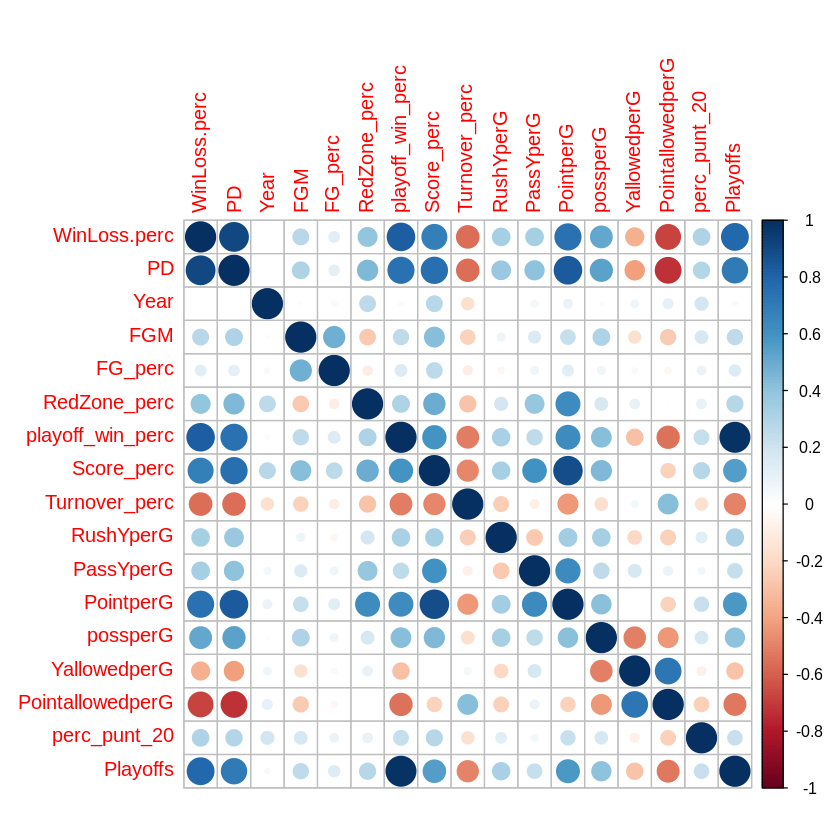

In [ ]:
# plot of correlations
corrplot(cor_variables)

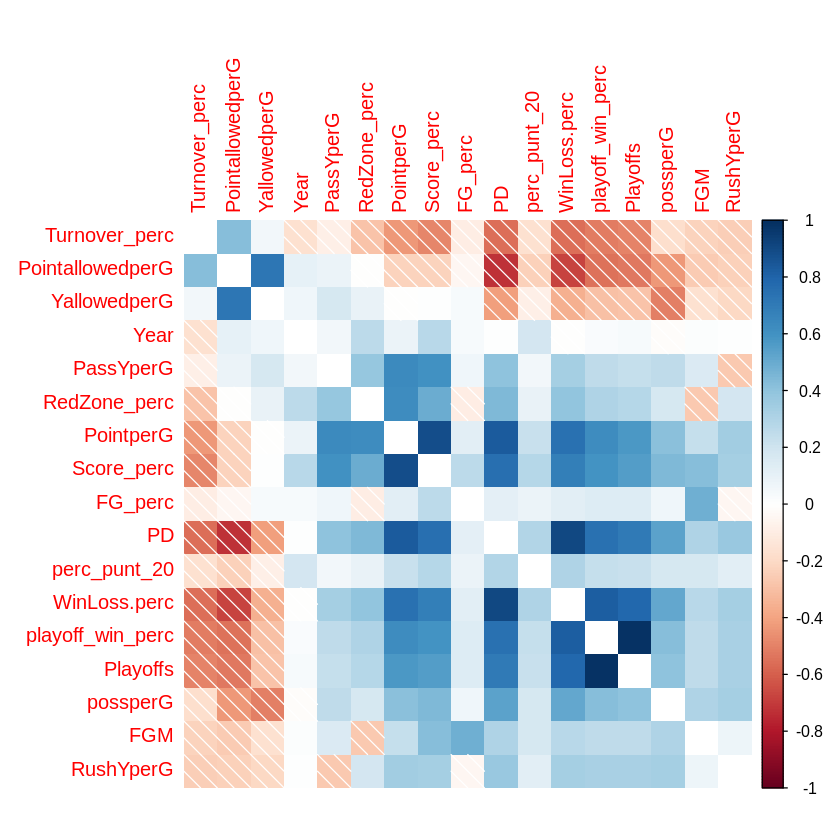

In [ ]:
# another correlation plot
corrplot(cor_variables, method = 'shade', order = 'AOE', diag = FALSE)

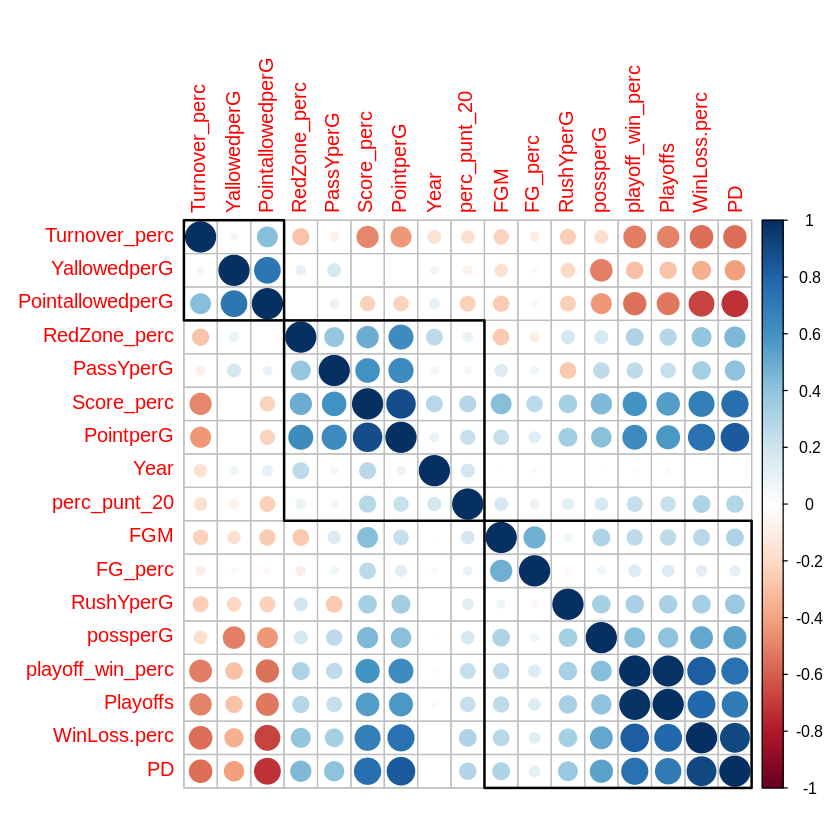

In [ ]:
# hclust corrplot
corrplot(cor_variables, order = 'hclust', addrect = 3)

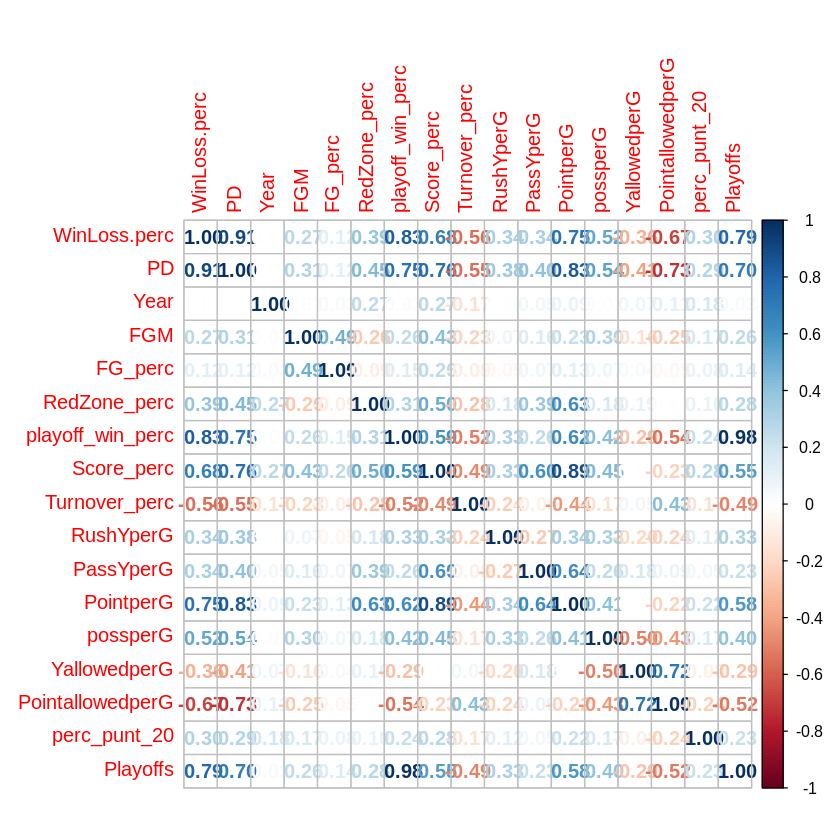

In [ ]:
# same plot of correlations with numbers instead of circles
corrplot(cor_variables, method = 'number')

#Highly correlated variables: PointPerG with WinLoss.perc and PD and Score_perc.
Semi-correlated variables: PointPerG with Redzone_perc, PossPerG with PD and WinLoss.perc, PointAllowed with YAllowed

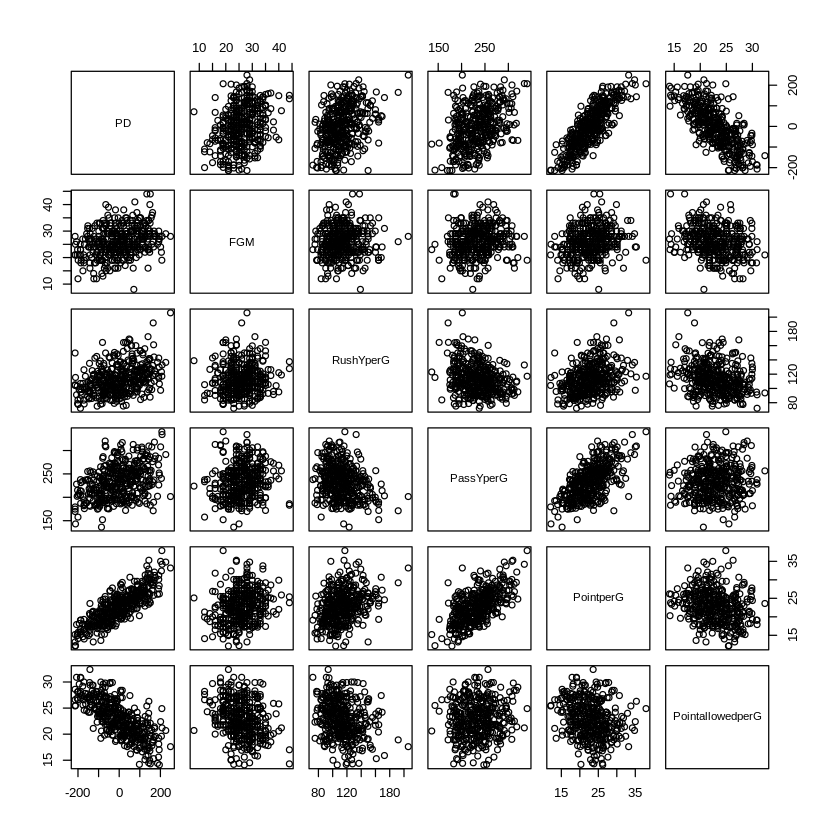

In [ ]:
# checking for multicollinearity
pairs(data[,c(3,5,11,12,13,16)])

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphic

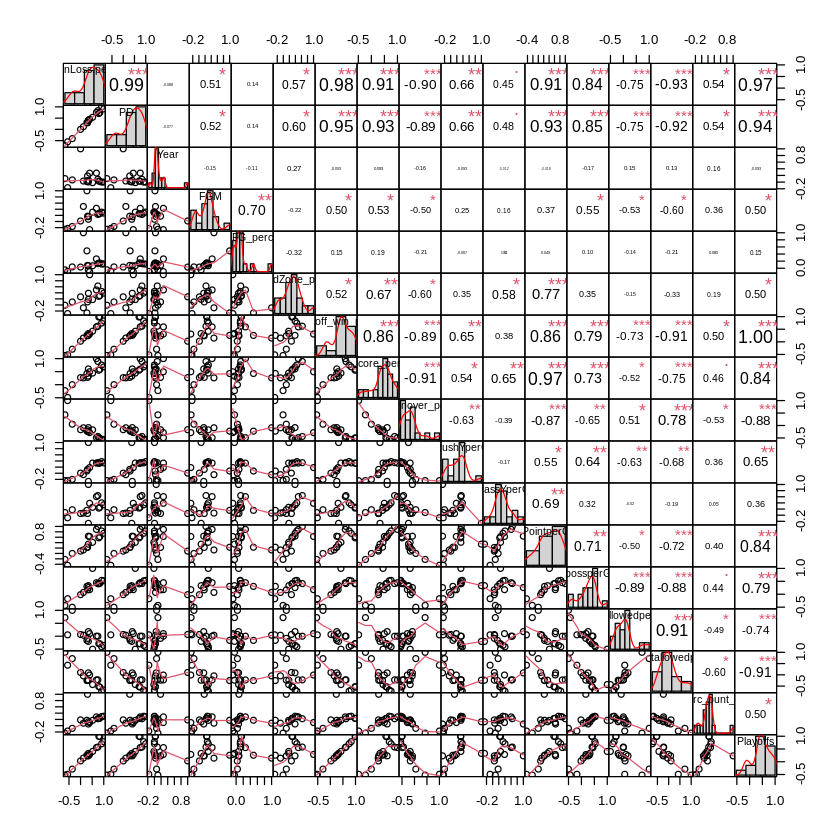

In [ ]:
chart.Correlation(cor_variables, histogram = TRUE, method = "pearson")

In [ ]:
panel.hist <- function(x, ...) {
    usr <- par("usr")
    on.exit(par(usr))
    par(usr = c(usr[1:2], 0, 1.5))
    his <- hist(x, plot = FALSE)
    breaks <- his$breaks
    nB <- length(breaks)
    y <- his$counts
    y <- y/max(y)
    rect(breaks[-nB], 0, breaks[-1], y, col = rgb(0, 1, 1, alpha = 0.5), ...)}

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphic

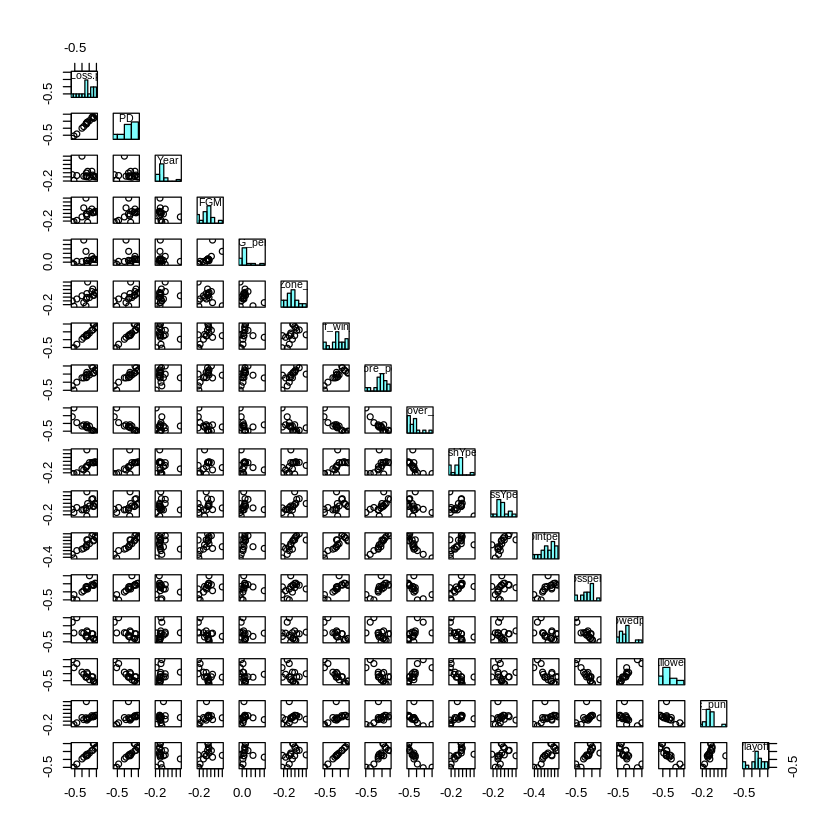

In [ ]:
pairs(cor_variables,
      upper.panel = NULL,         # Disabling the upper panel
      diag.panel = panel.hist)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’



Attaching package: ‘psych’


The following object is masked from ‘package:car’:

    logit


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




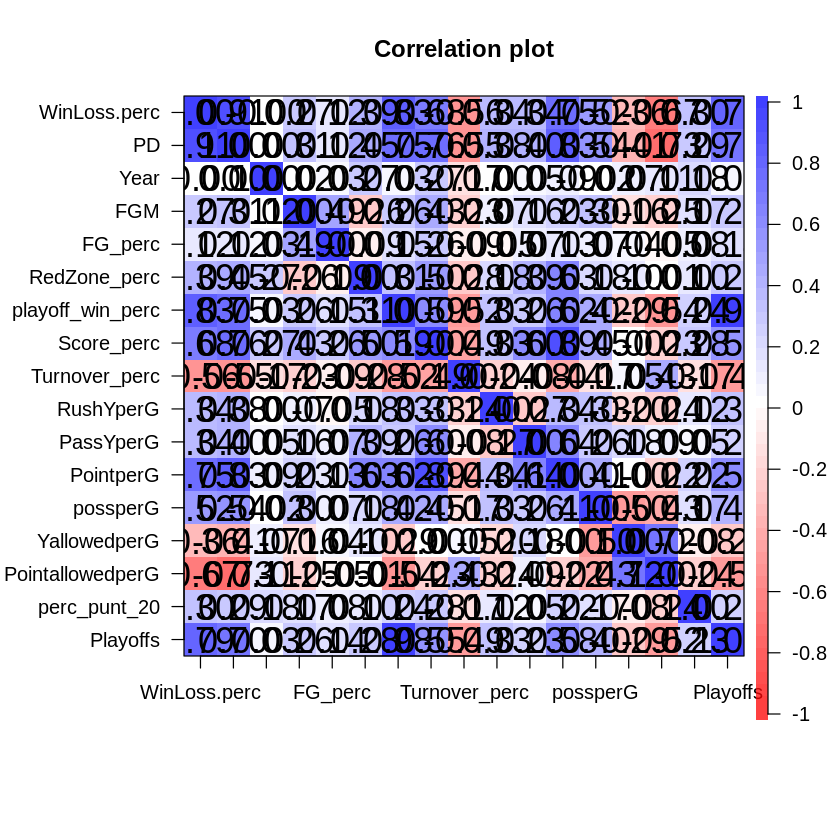

In [ ]:
corPlot(cor_variables, cex = 1.2)

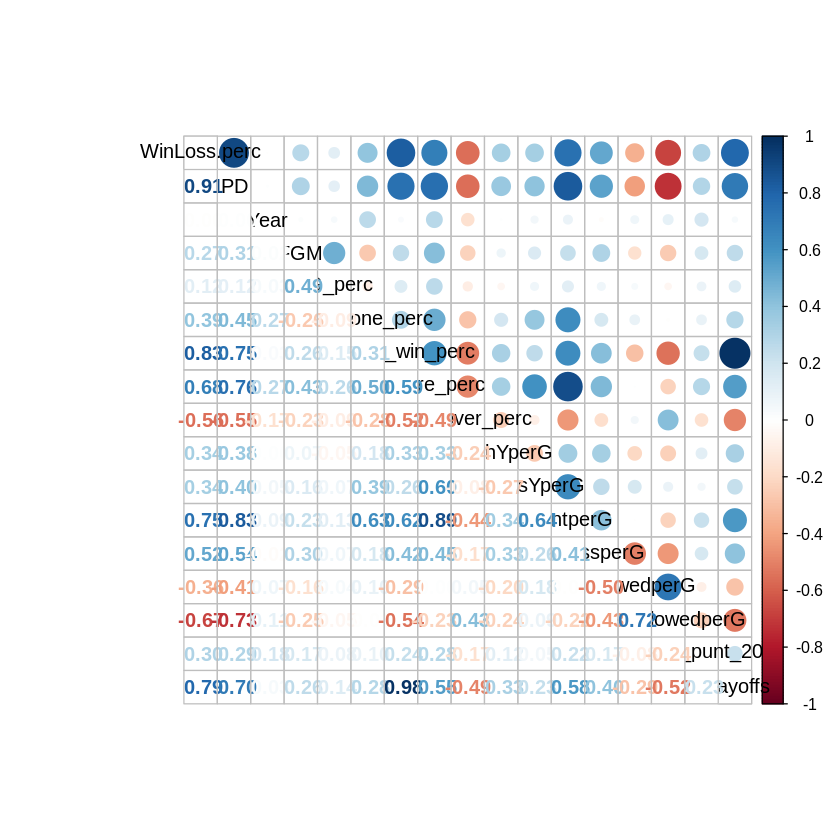

In [ ]:
corrplot.mixed(cor_variables,
               lower = "number",
               upper = "circle",
               tl.col = "black")

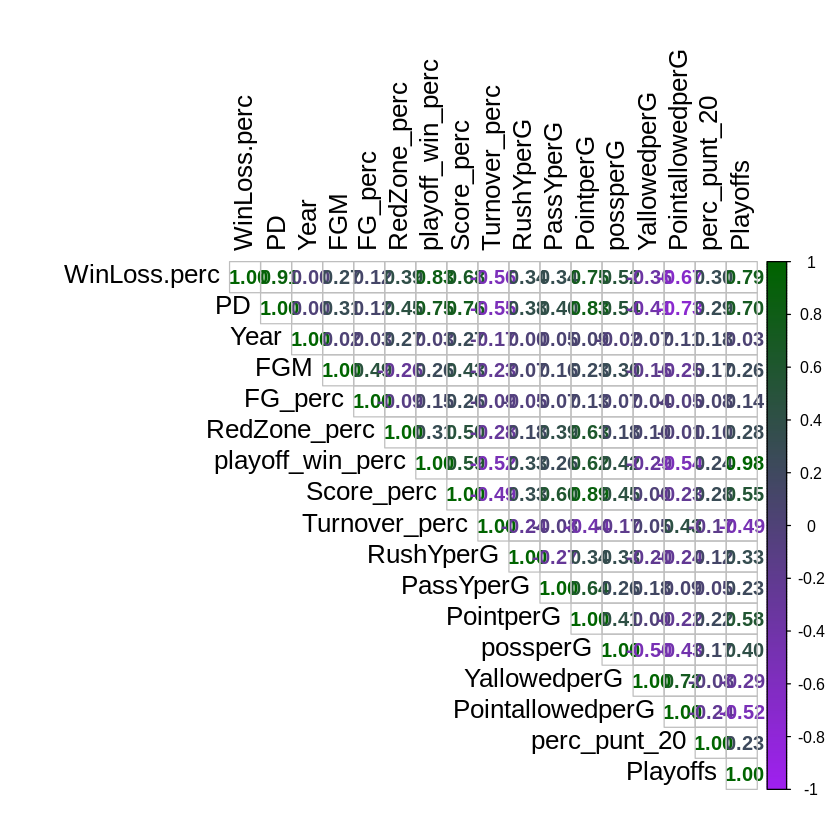

In [ ]:
corrplot(
 cor_variables,
 method = "number",
 type = "upper",
 tl.col = "black",
 tl.cex = 1.3,
 col = colorRampPalette(c("purple", "dark green"))(200)
)

In [ ]:
corrplot

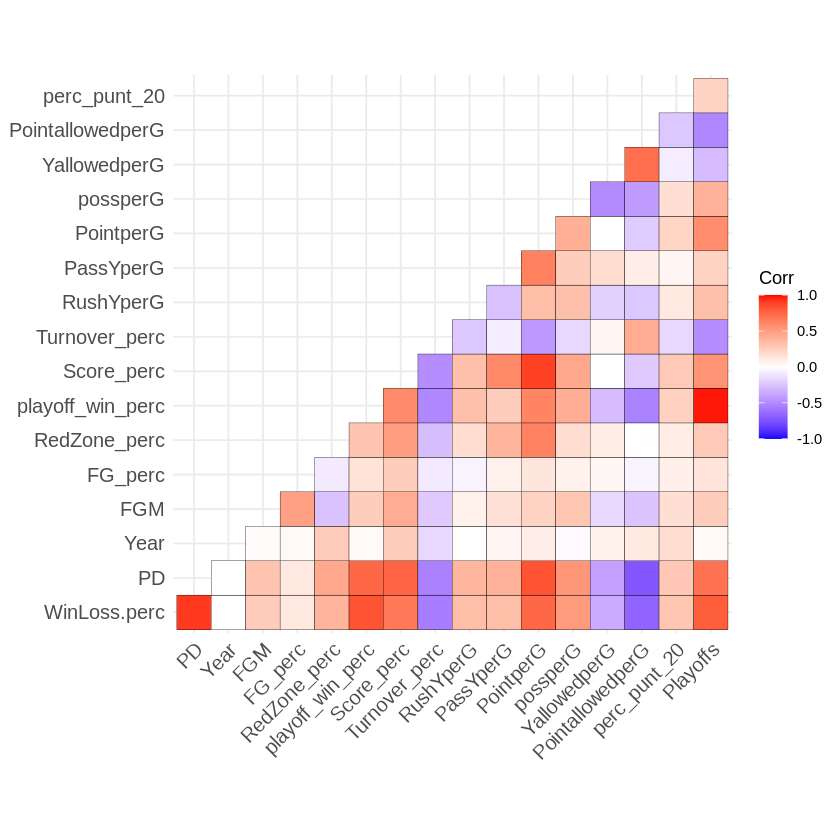

In [ ]:
ggcorrplot(cor_variables,
 method = "square",
 type = "lower",
 outline.color = "black",
 lab_size = 6)

In [ ]:
# training data from 2010-2020
training_data <- data %>% filter(Year != 2021)

In [ ]:
# Validation set
validation_data <- data %>% filter(Year == 2021)

In [ ]:
# stepwise variables, training data
logistic.playoffs <- glm(
                                    Playoffs ~ FG_perc + Turnover_perc + PointallowedperG + possperG + PD + PointperG,
                                    data=training_data,
                                    family="binomial"
                                  )

In [ ]:
(training_data
 %>% mutate("Predicted_Probability_Yes" = predict(logistic.playoffs, data=training_data, type="response"))
 %>% mutate("Predicted_Playoffs" = ifelse(Predicted_Probability_Yes > 0.50, "1", "0"))
 ) -> logistic.playoffs.predictions

In [ ]:
(logistic.playoffs.predictions
 %>% summarize("Accuracy" = mean(Playoffs == Predicted_Playoffs),
               "Missclassification Rate" = mean(Playoffs != Predicted_Playoffs)
               )
 %>% gather(key="Metric", value="Value")
)

Metric,Value
<chr>,<dbl>
Accuracy,0.8693182
Missclassification Rate,0.1306818


In [ ]:
# stepwise variables, validation data
logistic.playoffs.valid <- glm(
                                    Playoffs ~ FG_perc + Turnover_perc + PointallowedperG + possperG + PD + PointperG,
                                    data=validation_data,
                                    family="binomial"
                                  )

In [ ]:
(validation_data
 %>% mutate("Predicted_Probability_Yes" = predict(logistic.playoffs.valid, data=validation_data, type="response"))
 %>% mutate("Predicted_Playoffs" = ifelse(Predicted_Probability_Yes > 0.50, "1", "0"))
 ) -> logistic.playoffs.predictions.valid

In [ ]:
(logistic.playoffs.predictions.valid
 %>% summarize("Accuracy" = mean(Playoffs == Predicted_Playoffs),
               "Missclassification Rate" = mean(Playoffs != Predicted_Playoffs)
               )
 %>% gather(key="Metric", value="Value")
)

Metric,Value
<chr>,<dbl>
Accuracy,0.84375
Missclassification Rate,0.15625


In [ ]:
# final variables, all data
LogisticModel_Playoffs2 <- glm(
                                    Playoffs ~ PD + RushYperG + Turnover_perc + FGM + PointallowedperG ,
                                    data=data,
                                    family="binomial"
                                  )

In [ ]:
summary(LogisticModel_Playoffs2)


Call:
glm(formula = Playoffs ~ PD + RushYperG + Turnover_perc + FGM + 
    PointallowedperG, family = "binomial", data = data)

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.611075   2.151333  -0.284  0.77638    
PD                0.025368   0.003628   6.991 2.72e-12 ***
RushYperG         0.010263   0.008556   1.200  0.23033    
Turnover_perc    -0.188006   0.064941  -2.895  0.00379 ** 
FGM               0.035062   0.031864   1.100  0.27118    
PointallowedperG -0.013628   0.068407  -0.199  0.84209    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 511.99  on 383  degrees of freedom
Residual deviance: 242.01  on 378  degrees of freedom
AIC: 254.01

Number of Fisher Scoring iterations: 6


In [ ]:
(data
 %>% mutate("Predicted_Probability_Yes" = predict(LogisticModel_Playoffs2, data=data, type="response"))
 %>% mutate("Predicted_Playoffs" = ifelse(Predicted_Probability_Yes > 0.50, "1", "0"))
 ) -> Playoff_modeling_with_predictions2


In [ ]:
Playoff_modeling_with_predictions2

In [ ]:
(apply_labels(Playoff_modeling_with_predictions2,
              Playoffs = "Actual: Playoffs",
              Predicted_Playoffs = "Predicted: Playoffs"
            )
) -> Playoff_modeling_with_predictions2

cross_cases(Playoff_modeling_with_predictions2, Playoffs, Predicted_Playoffs, total_row_position ="none")

|                  |    | Predicted: Playoffs |     |
 |                  |    |                   0 |   1 |
 | ---------------- | -- | ------------------- | --- |
 | Actual: Playoffs |  0 |                 213 |  23 |
 |                  |  1 |                  30 | 118 |

In [ ]:
(Playoff_modeling_with_predictions2
 %>% summarize("Accuracy" = mean(Playoffs == Predicted_Playoffs),
               "Missclassification Rate" = mean(Playoffs != Predicted_Playoffs)
               )
 %>% gather(key="Metric", value="Value")
)

Metric,Value
<chr>,<dbl>
Accuracy,0.8619792
Missclassification Rate,0.1380208


In [ ]:
# logistic model using 2010-2020 data only
LogisticModel_Playoffs_training_data <- glm(
                                    Playoffs ~ PD + RushYperG + Turnover_perc + FGM + PointallowedperG,
                                    data=training_data,
                                    family="binomial"
                                  )

In [ ]:
(training_data
 %>% mutate("Predicted_Probability_Yes" = predict(LogisticModel_Playoffs_training_data, data= training_data, type="response"))
 %>% mutate("Predicted_Playoffs" = ifelse(Predicted_Probability_Yes > 0.50, "1", "0"))
 ) -> Playoff_modeling_with_predictions_training_data

In [ ]:
(apply_labels(Playoff_modeling_with_predictions_training_data,
              Playoffs = "Actual: Playoffs",
              Predicted_Playoffs = "Predicted: Playoffs"
            )
) -> Playoff_modeling_with_predictions_training_data

cross_cases(Playoff_modeling_with_predictions_training_data, Playoffs, Predicted_Playoffs, total_row_position ="none")

|                  |    | Predicted: Playoffs |     |
 |                  |    |                   0 |   1 |
 | ---------------- | -- | ------------------- | --- |
 | Actual: Playoffs |  0 |                 200 |  18 |
 |                  |  1 |                  26 | 108 |

In [ ]:
(Playoff_modeling_with_predictions_training_data
 %>% summarize("Accuracy" = mean(Playoffs == Predicted_Playoffs),
               "Missclassification Rate" = mean(Playoffs != Predicted_Playoffs)
               )
 %>% gather(key="Metric", value="Value")
)

Metric,Value
<chr>,<dbl>
Accuracy,0.875
Missclassification Rate,0.125


In [ ]:
# validation data using only 2021 data
LogisticModel_Playoffs_validation_data <- glm(
                                    Playoffs ~ PD + RushYperG + Turnover_perc + FGM + PointallowedperG,
                                    data=validation_data,
                                    family="binomial"
                                  )

In [ ]:
(validation_data
 %>% mutate("Predicted_Probability_Yes" = predict(LogisticModel_Playoffs_validation_data, data= validation_data, type="response"))
 %>% mutate("Predicted_Playoffs" = ifelse(Predicted_Probability_Yes > 0.50, "1", "0"))
 ) -> Playoff_modeling_with_predictions_validation_data

In [ ]:
(apply_labels(Playoff_modeling_with_predictions_validation_data,
              Playoffs = "Actual: Playoffs",
              Predicted_Playoffs = "Predicted: Playoffs"
            )
) -> Playoff_modeling_with_predictions_validation_data

cross_cases(Playoff_modeling_with_predictions_validation_data, Playoffs, Predicted_Playoffs, total_row_position ="none")

|                  |    | Predicted: Playoffs |    |
 |                  |    |                   0 |  1 |
 | ---------------- | -- | ------------------- | -- |
 | Actual: Playoffs |  0 |                  17 |  1 |
 |                  |  1 |                   1 | 13 |

In [ ]:
(Playoff_modeling_with_predictions_validation_data
 %>% summarize("Accuracy" = mean(Playoffs == Predicted_Playoffs),
               "Missclassification Rate" = mean(Playoffs != Predicted_Playoffs)
               )
 %>% gather(key="Metric", value="Value")
)

Metric,Value
<chr>,<dbl>
Accuracy,0.9375
Missclassification Rate,0.0625


In [ ]:
# 2023 data
data_2023 <- read.csv("https://raw.githubusercontent.com/lcory15/Capstone/main/2023%20data.csv")

In [ ]:
data_2023

In [ ]:
data_2023 <- data_2023[-c(8,9)]

In [ ]:
LogisticModel_Playoffs_2023_playoffs <- glm(
                                    Playoffs ~ PD + RushYPerG + Turnover_Perc + FGM + PAllowedPerG,
                                    data=data_2023,
                                    family="binomial"
                                  )

In [ ]:
(data_2023
 %>% mutate("Predicted_Probability_Yes" = predict(LogisticModel_Playoffs_2023_playoffs, data= data_2023, type="response"))
 %>% mutate("Predicted_Playoffs" = ifelse(Predicted_Probability_Yes > 0.50, "1", "0"))
 ) -> Playoff_modeling_with_predictions_2023_Playoffs

In [ ]:
(apply_labels(Playoff_modeling_with_predictions_2023_Playoffs,
              Playoffs = "Actual: Playoffs",
              Predicted_Playoffs = "Predicted: Playoffs"
            )
) -> Playoff_modeling_with_predictions_2023_Playoffs

cross_cases(Playoff_modeling_with_predictions_2023_Playoffs, Playoffs, Predicted_Playoffs, total_row_position ="none")

|                  |    | Predicted: Playoffs |    |
 |                  |    |                   0 |  1 |
 | ---------------- | -- | ------------------- | -- |
 | Actual: Playoffs |  0 |                  16 |  2 |
 |                  |  1 |                   2 | 12 |

In [ ]:
(Playoff_modeling_with_predictions_2023_Playoffs
 %>% summarize("Accuracy" = mean(Playoffs == Predicted_Playoffs),
               "Missclassification Rate" = mean(Playoffs != Predicted_Playoffs)
               )
 %>% gather(key="Metric", value="Value")
)

Metric,Value
<chr>,<dbl>
Accuracy,0.875
Missclassification Rate,0.125


In [ ]:
Playoff_modeling_with_predictions_2023_Playoffs

In [ ]:
Playoff_modeling_with_predictions_2023_Playoffs %>% filter(Playoffs != Predicted_Playoffs)

Team,PD,FGM,RushYPerG,Turnover_Perc,PAllowedPerG,Playoffs,Predicted_Probability_Yes,Predicted_Playoffs
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<labelled>,<dbl>,<labelled>
Chicago Bears,-19,35,141.11765,13.0,22.29412,0,0.5185794,1
Philadelphia Eagles,5,30,128.82353,15.3,25.17647,1,0.4758329,0
New Orleans Saints,75,30,102.47059,8.2,19.23529,0,0.9609844,1
Tampa Bay Buccaneers,23,29,88.76471,9.8,19.11765,1,0.4967421,0


#This model tells me that the New Orleans Saints and Chicago Bears should have made the playoffs and the Philadelphia Eagles and Tampa Bay Buccaneers should not have. Accuracy rate for this model was 87.5%

#Miscue on Bucs: Lowest Rush Yards, Low PD
#Miscue on Saints: Low Turnover_Perc, Low PAllowed
#Miscue on Eagles: High Turnover_perc, High PAllowed, Low PD
#Miscue on Bears: Highest Rush Yards

#Link to where I got the original data from
https://www.kaggle.com/datasets/shanyachaubey/nfl20102021offdefplayoffteamstats
